# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:  $\color{orange}{\text{Tesheena}}$ [git repo](https://github.com/tsngh/web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## $\color{orange}{\text{Prerequsites Check}}$

In [13]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            VersionAll prereqs installed.

------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.6
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy     

## $\color{orange}{\text{Question 1}}$

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [14]:
import requests
from bs4 import BeautifulSoup
import pickle

#url to extract file from
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)
#parse html content
soup = BeautifulSoup(response.content, "html.parser")
#find article content
article_content = soup.find("article").decode_contents()
#dump to pkl
with open("article.pkl","wb") as file:
    pickle.dump(article_content,file)


## $\color{orange}{\text{Question 2}}$

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [15]:
import pickle

#read htmp source from file created
with open("article.pkl", "rb") as file:
    article_html = pickle.load(file)
article_text = BeautifulSoup(article_html, "html.parser").get_text()

#print text 
print(article_text)





How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

## $\color{orange}{\text{Question 3}}$

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [21]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

#load article
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
#remove noise
tokens = [token.lower_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
token_counts = Counter (tokens)

#top 5 common and frequencies
print("The 5 most common tokens and their frequencies are:")
for token, count in token_counts.most_common(5):
    print(f"-{token}: {count}")

#all tokens and frequencies
print("\nAll tokens and their frequencies:")
for token, count in token_counts.items():
    print(f"-{token}: {count}")





The 5 most common tokens and their frequencies are:
-laser: 35
-headlights: 19
-headlight: 11
-technology: 10
-led: 10

All tokens and their frequencies:
-laser: 35
-headlights: 19
-work: 2
-130: 1
-comments: 1
-lewin: 1
-day: 3
-march: 2
-22: 1
-2021: 1
-think: 1
-onward: 1
-automotive: 6
-technology: 10
-usually: 1
-thing: 2
-come: 5
-mind: 3
-engines: 1
-fuel: 1
-efficiency: 3
-switch: 2
-electric: 1
-power: 3
-mean: 1
-thousands: 1
-engineers: 2
-world: 2
-working: 1
-improve: 1
-state: 2
-art: 1
-lighting: 4
-sealed: 2
-beam: 7
-gave: 1
-way: 4
-modern: 2
-designs: 3
-regulations: 1
-loosened: 1
-bulbs: 1
-moved: 2
-simple: 3
-halogens: 1
-xenon: 1
-hids: 1
-recently: 1
-leds: 6
-new: 3
-scene: 1
-lasers: 5
-bwm: 2
-prototype: 1
-headlight: 11
-assemblies: 1
-undergoing: 1
-testing: 1
-image: 2
-brought: 1
-phrase: 1
-beams: 5
-firing: 1
-automobile: 1
-obviously: 1
-coherent: 1
-monochromatic: 1
-light: 9
-poor: 1
-illumination: 2
-outside: 1
-specific: 1
-spot: 2
-distance: 1
-a

## $\color{orange}{\text{Question 4}}$

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [23]:
#load into trained spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
#remove noise
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
lemma_counts = Counter(lemmas)

#top 5 common and frequencies
print("The 5 most common lemmas and their frequencies are:")
for lemma, count in lemma_counts.most_common(5):
    print(f"-{lemma}: {count}")

#all lemmas and frequencies
print("\nAll lemmas and their frequencies:")
for lemma, count in lemma_counts.items():
    print(f"-{lemma}: {count}")



The 5 most common lemmas and their frequencies are:
-laser: 40
-headlight: 28
-beam: 12
-technology: 10
-light: 10

All lemmas and their frequencies:
-laser: 40
-headlights: 2
-work: 3
-130: 1
-comments: 1
-lewin: 1
-day: 4
-march: 2
-22: 1
-2021: 1
-think: 1
-onward: 1
-automotive: 6
-technology: 10
-headlight: 28
-usually: 1
-thing: 3
-come: 7
-mind: 3
-engine: 1
-fuel: 1
-efficiency: 3
-switch: 2
-electric: 1
-power: 3
-mean: 2
-thousand: 1
-engineer: 2
-world: 2
-improve: 1
-state: 2
-art: 1
-lighting: 4
-seal: 1
-beam: 12
-give: 1
-way: 4
-modern: 2
-design: 6
-regulation: 1
-loosen: 1
-bulb: 1
-move: 2
-simple: 3
-halogen: 1
-xenon: 1
-hids: 1
-recently: 1
-led: 7
-new: 3
-scene: 1
-bwm: 2
-prototype: 1
-assembly: 2
-undergo: 1
-testing: 1
-image: 2
-bring: 2
-phrase: 1
-fire: 2
-automobile: 2
-obviously: 1
-coherent: 1
-monochromatic: 1
-light: 10
-poor: 1
-illumination: 2
-outside: 1
-specific: 1
-spot: 2
-distance: 1
-away: 1
-thankfully: 2
-eye: 1
-instead: 1
-consist: 1
-sol

## $\color{orange}{\text{Question 5}}$

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [41]:
import pickle
from bs4 import BeautifulSoup
import spacy


nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    score = sum(token in interesting_tokens for token in tokens) 
    return score / len(tokens) if tokens else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower()for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    score = sum(lemma in interesting_lemmas for lemma in lemmas)
    return score / len(lemmas) if lemmas else 0

with open("article.pkl", "rb") as file:
    article_text = pickle.load(file)

doc = nlp(article_text)

first_sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind"
interesting_tokens = ["laser","headlights", "headlight", "technology", "led"]
interesting_lemmas = ["laser", "headlight", "beam", "technology", "light"]

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)
print(f"Token score of sentence is :{token_score}")
print(f"Lemma score of sentence is: {lemma_score}")




Token score of sentence is :0.2
Lemma score of sentence is: 0.2


## $\color{orange}{\text{Question 6}}$

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

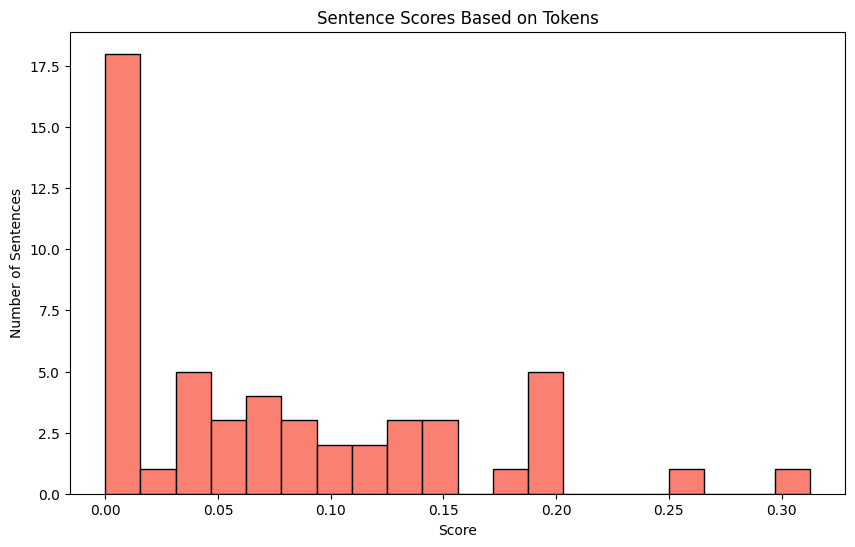

The most common range of scores seems to be between 0.1 and 0.3 which indicates that most of the sentences use a minimum number of the interesting tokens we analyzed earlier 


In [42]:
import matplotlib.pyplot as plt

interesting_tokens = ["laser", "headlight", "light", "led", "car"]

#split article
sentences = [sent.text for sent in nlp(article_text).sents]

#calculate score each sentence
sentence_scores = [score_sentence_by_token(sent, interesting_tokens) for sent in sentences]

#histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color ="salmon", edgecolor="black")
plt.title("Sentence Scores Based on Tokens")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.show()

print("The most common range of scores seems to be between 0.1 and 0.3 which indicates that most of the sentences use a minimum number of the interesting tokens we analyzed earlier ")

## $\color{orange}{\text{Question 7}}$

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

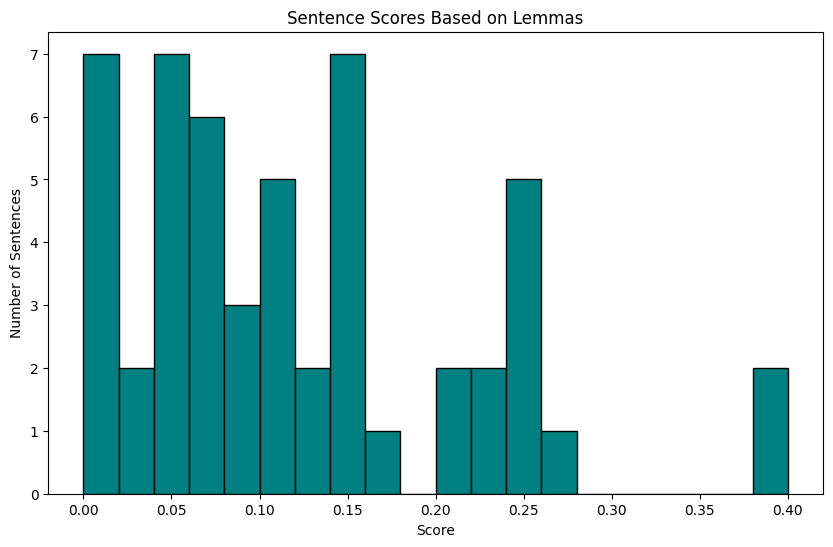

The most common range of scores seems to be between 0 and 0.16 which indicates that most of the sentences use a fair amount of the interesting lemmas we analyzed earlier 


In [43]:
interesting_lemmas = ["laser", "headlight", "beam", "technology", "light"]

#split article
sentences = [sent.text for sent in nlp(article_text).sents]

#calculate score each sentence
sentence_scores = [score_sentence_by_lemma(sent, interesting_lemmas) for sent in sentences]

#histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color ="teal", edgecolor="black")
plt.title("Sentence Scores Based on Lemmas")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.show()

print("The most common range of scores seems to be between 0 and 0.16 which indicates that most of the sentences use a fair amount of the interesting lemmas we analyzed earlier ")

## $\color{orange}{\text{Question 8}}$

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

All of the words in both lists can be considered as nouns. If we wanted to specify to only consider nouns, we can alter the codes in the time that omits spaces, punctations and stops by doing the following:

tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.pos_ == 'NOUN']
noun_tokens = [token.lower_ for token in doc if token.pos_ == 'NOUN']

lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.pos_ == 'NOUN']
noun_lemas = [token.lemma_.lower_ for token in doc if token.pos_ == 'NOUN']
